<a href="https://colab.research.google.com/github/raphaelchaves/papa-linguas/blob/main/Projeto_PLN_ICMC_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://4.bp.blogspot.com/-tbAWK7KCPq0/TbVg-SmjNFI/AAAAAAAAAtQ/QboG2_SDuNo/s1600/logo+fiinal.jpg" width="300">


#Análise de Sentimentos

Projeto sobre análise de sentimentos desenvolvido como parte da disciplina de Processamento em Língua Natural. ICMC-USP

## Principais Etapas:
1. **Coleta de Dados**
2. **Pré-processamento de Dados**
3. **Nuvem de Palavras**
4. **Remoção de Stop Words**
5. **Tokenização**
6. **Análise Exploratória dos Dados**
7. **Lematização**
7. **Mapeamento do Rating**
9. **Variável Target**
10. **Análise de Desbalanceamento**
11. **Bag of Words (BoW)**
12. **Divisão dos dados - Treino e Teste**
13. **Balanceamento de Classes**
14. **Treinar o Modelo**
15. **Testar o Modelo**


### 1ª Etapa: Carregando Bibliotecas Necessárias:


In [2]:
import requests
import zipfile
import io
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import RSLPStemmer
import spacy

### 1ª Etapa: Coleta de Dados


In [3]:
# URL do arquivo ZIP no GitHub
url = 'https://github.com/raphaelchaves/papa-linguas/raw/main/b2w.csv.zip'

# Passo 1: Fazer o download do arquivo ZIP
response = requests.get(url)

# Garantir que a requisição foi bem-sucedida
if response.status_code == 200:
    print("Get request efetuado com sucesso!")
else:
    print("Falha ao ler o arquivo")

# Passo 2: Ler o CSV diretamente do ZIP sem extraí-lo
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    # Passo 3: Abrir o arquivo CSV dentro do ZIP e carregá-lo diretamente no Pandas
    with zip_ref.open('b2w.csv') as file:
        original_data = pd.read_csv(file)


Get request efetuado com sucesso!


### 2ª Etapa: Exibe as primeiras 10 linhas do DataFrame Pré-Processado

In [4]:
# Exibe o conteúdo de um Paandas dataFrame (df) em formato de uma tabela HTML
display(HTML(original_data.to_html(max_rows=10)))

,original_index,review_text,review_text_processed,review_text_tokenized,polarity,rating,kfold_polarity,kfold_rating
0,11955,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,bem macio e felpudo...recomendo. preco imbativel e entrega rapida. compraria outro quando precisar,"['bem', 'macio', 'felpudo', 'recomendo', 'preco', 'imbativel', 'entrega', 'rapida', 'compraria', 'outro', 'quando', 'precisar']",1.0,4,1,1
1,35478,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,produto excepcional! recomendo!!! inovador e gostoso de ler!!,"['produto', 'excepcional', 'recomendo', 'inovador', 'gostoso', 'de', 'ler']",1.0,5,1,1
2,122760,recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto,recebi o produto antes do prazo mas veio com defeito na trava ou seja nao da para usar e ate agora a americanas nao resolveu e preciso muito deste produto,"['recebi', 'produto', 'antes', 'do', 'prazo', 'mas', 'veio', 'com', 'defeito', 'na', 'trava', 'ou', 'seja', 'nao', 'da', 'para', 'usar', 'ate', 'agora', 'americanas', 'nao', 'resolveu', 'preciso', 'muito', 'deste', 'produto']",0.0,1,1,1
3,17114,Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.,bom custo beneficio. adequado para pessoas que fazem um uso casual do aparelho . a maquina fotografica e excelente . a tela fornece imagens otimas . os recursos do aparelho sao faceis de manejar.,"['bom', 'custo', 'beneficio', 'adequado', 'para', 'pessoas', 'que', 'fazem', 'um', 'uso', 'casual', 'do', 'aparelho', 'maquina', 'fotografica', 'excelente', 'tela', 'fornece', 'imagens', 'otimas', 'os', 'recursos', 'do', 'aparelho', 'sao', 'faceis', 'de', 'manejar']",1.0,5,1,1
4,19112,"Além de higiênico tem o tamanho ideal. Só faltou colher e garfo de sobremesa. Talvez se viesse com mais peças, eu gostaria mais.","alem de higienico tem o tamanho ideal. so faltou colher e garfo de sobremesa. talvez se viesse com mais pecas, eu gostaria mais.","['alem', 'de', 'higienico', 'tem', 'tamanho', 'ideal', 'so', 'faltou', 'colher', 'garfo', 'de', 'sobremesa', 'talvez', 'se', 'viesse', 'com', 'mais', 'pecas', 'eu', 'gostaria', 'mais']",NaN,3,-1,1
...,...,...,...,...,...,...,...,...
132368,41993,SMARTHPHONE PERFEITO MUITO BOM E A ECONOMIA DE ENERGIA PERFEITA A BATERIA DURA MUITO VENDO VIDEOS NO YOUTUBE E A MEMORIA DELE É FANTASTICA E A ENTREGA AMERICANAS ENTREGOU UMA SEMANA DEPOIS DO PEDIDO SENDO QUE A ENTREGA ERA SÓ DIA 9 DE MARÇO,smarthphone perfeito muito bom e a economia de energia perfeita a bateria dura muito vendo videos no youtube e a memoria dele e fantastica e a entrega americanas entregou uma semana depois do pedido sendo que a entrega era so dia 9 de marco,"['smarthphone', 'perfeito', 'muito', 'bom', 'economia', 'de', 'energia', 'perfeita', 'bateria', 'dura', 'muito', 'vendo', 'videos', 'no', 'youtube', 'memoria', 'dele', 'fantastica', 'entrega', 'americanas', 'entregou', 'uma', 'semana', 'depois', 'do', 'pedido', 'sendo', 'que', 'entrega', 'era', 'so', 'dia', 'de', 'marco']",1.0,5,10,10
132369,97639,Eu estou muito chateado com isso gostaria que vcs resolve-se rápido pq já estou pagando uma coisa sem usar. Amanhã eu vou falar com meu advogado pra resolver o mas rápido possível. E tem mais eu já ia fazer outra compra mas desse jeito não dar. Estou aguardando meu produto o mas rápido q vcs poder. O mas obrigado,eu estou muito chateado com isso gostaria que vcs resolve-se rapido pq ja estou pagando uma coisa sem usar. amanha eu vou falar com meu advogado pra resolver o mas rapido possivel. e tem mais eu ja ia fazer outra compra mas desse jeito nao dar. estou aguardando meu produto o mas rapido q vcs poder. o mas obrigado,"['eu', 'estou', 'muito', 'chateado', 'com', 'isso', 'gostaria', 'que', 'vcs', 'resolve', 'se', 'rapid

### 3ª Etapa: Inicia Pré-Processamento dos Dados:

In [5]:
# A base de dados original já contempla alguns dados pré-processados. Nesta etapa, vamos manter apenas os atributos "review_text" e "rating", dado que nós efetuaremos as etapas de pré-processamento dos dados.

# Cria um novo dataframe chamado "development_sample" contendo apenas os seguintes atributos:
# a) review_text
# b) rating
development_sample = original_data[['review_text', 'rating']]

In [6]:
# Remove valores NaN
development_sample.dropna(inplace = True)

<ipython-input-6-e7a227a0e639>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample.dropna(inplace = True)


In [7]:
# Remove Dados Duplicados
development_sample.drop_duplicates(keep='first', inplace=True)

<ipython-input-7-58d05a2e10c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample.drop_duplicates(keep='first', inplace=True)


In [8]:
# Cria um novo atributo na qual o texto será convertido apenas para letras minúsculas
development_sample['review_text_preprocessed'] = development_sample['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

<ipython-input-8-ae89e65ff617>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_text_preprocessed'] = development_sample['review_text'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [9]:
# Remover pontuação e adicionar espaço usando expressões regulares (Noise)
development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].str.replace(r'[^\w\s]', ' ', regex=True)


<ipython-input-9-90c0f2111de6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].str.replace(r'[^\w\s]', ' ', regex=True)


In [10]:
# Remove números
development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].str.replace('\d+', ' ', regex=True)

<ipython-input-10-71d6db2a0748>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].str.replace('\d+', ' ', regex=True)


### 4ª Etapa: Nuvem de Palavras

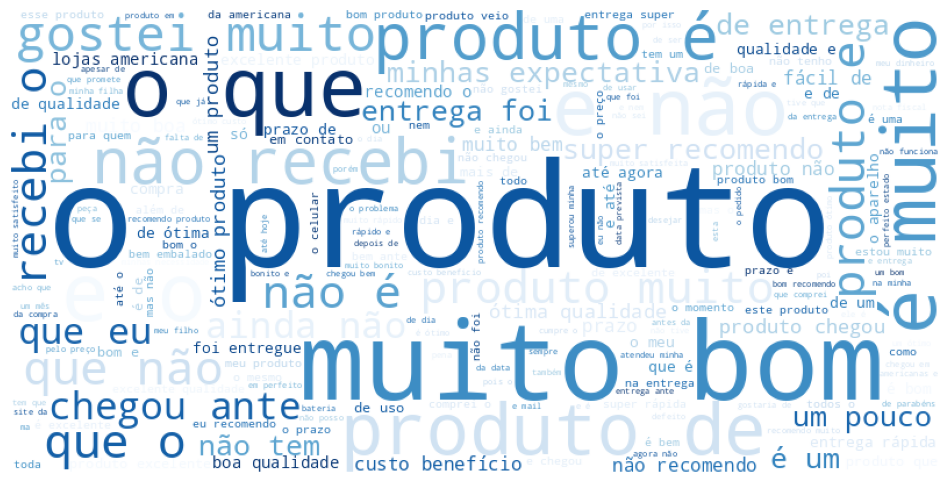

In [11]:
# Neste momento, não aplicamos a "Lematização", dado que a Nuvem de Palavras não deve mostrar palavras cortadas ou reduzidas, sob o risco de perder seu sentido. Portanto, aplicamos somente o pré-processamento e limpeza inicial dos dados. A remoção de stopwords será feita em seguida.

# Combina todos os comentários numa string única
text = ' '.join(development_sample['review_text_preprocessed'])

# Cria a Nuvem de Palavras
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues_r').generate(text)

# Plotando a Nuvem de Palavras
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 5ª Etapa: Remoção de Stop Words

**Objetivo:**
Na análise de sentimentos, a etapa de remoção de stop words é uma etapa fundamental do pré-processamento de texto. Stop words são palavras que, em geral, não agregam significado relevante ao contexto do texto quando analisado em um modelo de análise de sentimentos ou outras tarefas de Processamento de Linguagem Natural (PLN).

**1) O que são stop words?**

Stop words são palavras muito comuns que geralmente são removidas durante o pré-processamento de texto. Estas palavras são necessárias para a estrutura gramatical das frases, mas não carregam informações significativas em termos de análise de sentimentos ou outras tarefas de NLP. Em português, algumas dessas palavras incluem:
*   Pronomes: eu, você, ele, ela, nós, eles, etc.
*   Artigos: o, a, os, as, um, uma, uns, umas.
*   Preposições: de, em, para, com, por, sobre, etc.
*   Conjunções: e, mas, ou, porque, que, etc.
*   Outras palavras comuns: muito, pouco, tudo, algo, etc.


Por exemplo:

Frase: "Eu gosto muito de chocolate."

Sem stop words: "gosto chocolate."

Nesse caso, palavras como "Eu", "muito", "de" não ajudam diretamente a identificar o sentimento (positivo ou negativo) da frase. O que é mais importante para identificar o sentimento aqui é "gosto" e "chocolate".


In [12]:
# Carregar stopwords em português
nltk.download('stopwords')
stop = stopwords.words('portuguese')

# Remover stopwords
development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

# Mostra algumas observações como exemplo
display(HTML(development_sample.to_html(max_rows=5)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-12-166bdffd1506>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_text_preprocessed'] = development_sample['review_text_preprocessed'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


,review_text,rating,review_text_preprocessed
0,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,4,bem macio felpudo recomendo preço imbatível entrega rápida compraria outro precisar
1,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,5,produto excepcional recomendo inovador gostoso ler
...,...,...,...
132370,"Vale a pena pelo preço oferecido, qualidade a altura pelo produto ofertado",3,vale pena preço oferecido qualidade altura produto ofertado
132372,"Não recebi o produto e consta como entregue no site, ja reclamei 3 vezes e a unica resposta que tive foi de que iriam averiguar... =/",1,recebi produto consta entregue site ja reclamei vezes unica resposta iriam averiguar


### 6ª Etapa: Inicia Processo de Tokenização

In [13]:
nltk.download('punkt_tab')

# Tokenizar o texto na coluna 'review_text_processed'
development_sample['review_text_tokenized'] = development_sample['review_text_preprocessed'].apply(lambda x: word_tokenize(x.lower()))

# Apresenta os 5 casos como exemplo
display(HTML(development_sample.to_html(max_rows=5)))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
<ipython-input-13-586f8de6f056>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_text_tokenized'] = development_sample['review_text_preprocessed'].apply(lambda x: word_tokenize(x.lower()))


,review_text,rating,review_text_preprocessed,review_text_tokenized
0,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,4,bem macio felpudo recomendo preço imbatível entrega rápida compraria outro precisar,"[bem, macio, felpudo, recomendo, preço, imbatível, entrega, rápida, compraria, outro, precisar]"
1,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,5,produto excepcional recomendo inovador gostoso ler,"[produto, excepcional, recomendo, inovador, gostoso, ler]"
...,...,...,...,...
132370,"Vale a pena pelo preço oferecido, qualidade a altura pelo produto ofertado",3,vale pena preço oferecido qualidade altura produto ofertado,"[vale, pena, preço, oferecido, qualidade, altura, produto, ofertado]"
132372,"Não recebi o produto e consta como entregue no site, ja reclamei 3 vezes e a unica resposta que tive foi de que iriam averiguar... =/",1,recebi produto consta entregue site ja reclamei vezes unica resposta iriam averiguar,"[recebi, produto, consta, entregue, site, ja, reclamei, vezes, unica, resposta, iriam, averiguar]"


### 6ª Etapa: Inicia Análise Explotratória dos Dados:

<ipython-input-14-f68e02b42aa9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=development_sample, palette=custom_palette)


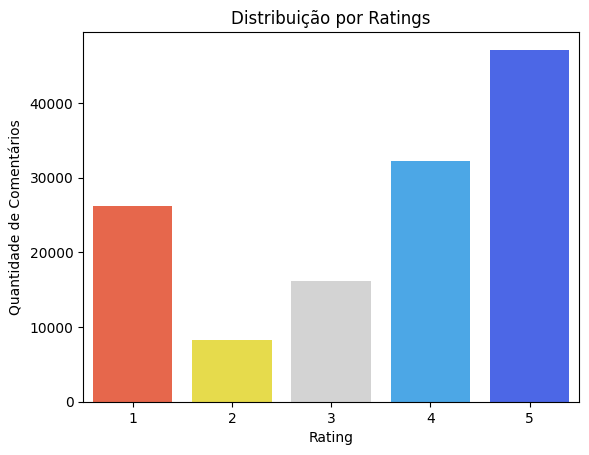

In [14]:
# Gráfico de Colunas que Apresenta a Distribuição dos Ratings

# Cria uma paleta de cores personalizada
custom_palette = sns.color_palette(["#FF5733", "#fff133","#d3d3d3","#33acff","#3357FF"])

# Plota Gráfico
sns.countplot(x='rating', data=development_sample, palette=custom_palette)
plt.title('Distribuição por Ratings')
plt.xlabel('Rating')
plt.ylabel('Quantidade de Comentários')
plt.show()

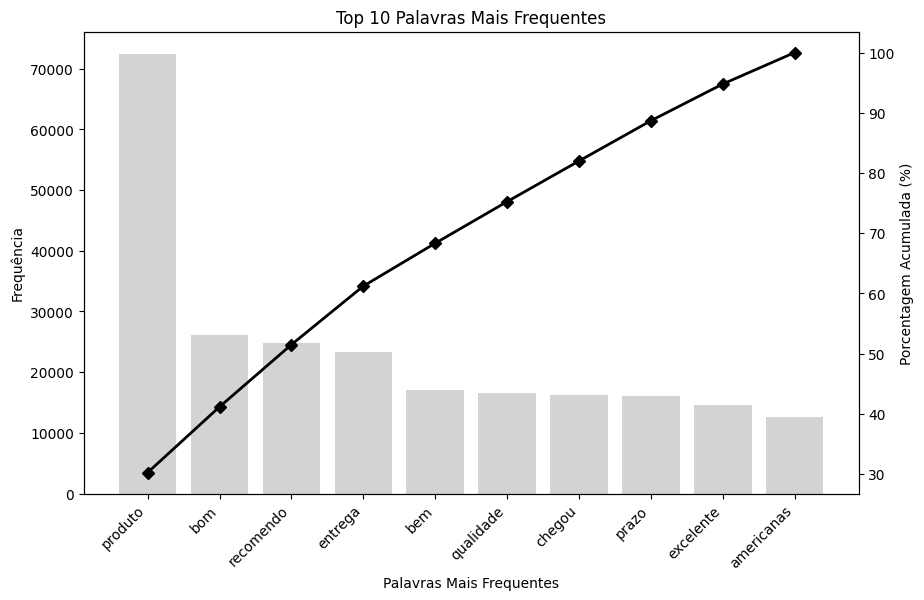

In [15]:
# Contar a frequência das palavras
all_tokens = [token for sublist in development_sample['review_text_tokenized'] for token in sublist]
word_freq = Counter(all_tokens)

# Pegar as 10 palavras mais frequentes
most_common_words = word_freq.most_common(10)

# Separar palavras e frequências
words, freqs = zip(*most_common_words)

# Calcular a porcentagem acumulada
freqs_cumsum = np.cumsum(freqs)  # Soma acumulada das frequências
total_freq = sum(freqs)  # Soma total das frequências
percent_cumsum = 100 * freqs_cumsum / total_freq  # Porcentagem acumulada

# Criar gráfico de Pareto
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfico de barras para as frequências
ax1.bar(words, freqs, color='lightgray')
ax1.set_xlabel('Palavras Mais Frequentes')
ax1.set_ylabel('Frequência')
ax1.set_title('Top 10 Palavras Mais Frequentes')

# Adicionar o eixo secundário para a linha acumulada
ax2 = ax1.twinx()
ax2.plot(words, percent_cumsum, color='black', marker='D', linestyle='-', linewidth=2)
ax2.set_ylabel('Porcentagem Acumulada (%)', color='black')

# Ajustar as etiquetas do eixo X com rotação de 45 graus
ax1.set_xticks(range(len(words)))  # Define as posições no eixo X
ax1.set_xticklabels(words, rotation=45, ha='right')  # Rotaciona e ajusta o alinhamento

# Exibir o gráfico
plt.show()


<ipython-input-16-1ad1532f822a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_length'] = development_sample['review_text_preprocessed'].apply(len)


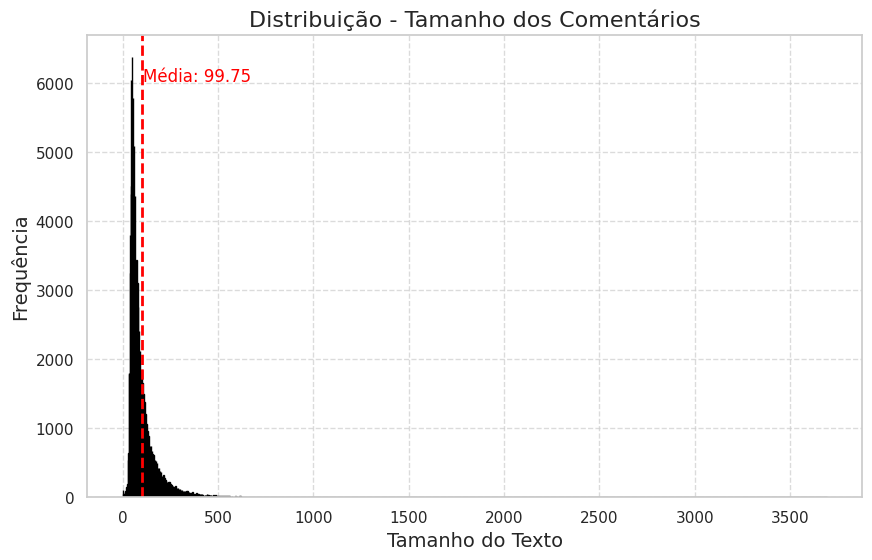

In [16]:
# Algumas estatísticas básicas sobre o tamanho de cada comentário
import matplotlib.pyplot as plt
import seaborn as sns

# Identifica tamanho do texto
development_sample['review_length'] = development_sample['review_text_preprocessed'].apply(len)

# Definir um estilo agradável para o gráfico
sns.set(style="whitegrid")

# Criar o histograma com melhorias visuais
plt.figure(figsize=(10, 6))  # Ajusta o tamanho do gráfico
ax = development_sample['review_length'].hist(bins='auto', edgecolor='black', color='skyblue')

# Adicionar título e rótulos
plt.title('Distribuição - Tamanho dos Comentários', fontsize=16)
plt.xlabel('Tamanho do Texto', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

# Adicionar uma grade para facilitar a leitura
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar a linha de média
mean = development_sample['review_length'].mean()
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2)
plt.text(mean + 5, plt.ylim()[1] * 0.9, f'Média: {mean:.2f}', color = 'red', fontsize=12)

# Mostrar o gráfico
plt.show()


### 7ª Etapa: Inicia Processo de Lematização:



In [21]:
# No process de "Lematização" vamos buscar reduzir a palavra à sua raiz, retirando todas as inflexões e chegando ao lemma. Porém, essa redução sempre resultará em uma palavra que realmente existe na gramática, diferentemente do processo de "Stemming". Outro ponto importante é que, nessa técnica, a classe gramatical da palavra será levada em consideração para fazer a redução. Para trabalhos de "Análise de Sentimentos", onde a precisão e a compreensão do significado das palavras são essenciais, a "Lematização" é mais indicada que a técnica de "Stemming". A "Lematização" é capaz de manter o contexto e a integridade semântica, permitindo que o modelo entenda melhor os sentimentos expressos no texto. Vamos agora utilizar a biblioteca spaCy para aplicar essa técnica.

# Instala modelo de lematização em português do spaCy
!python -m spacy download pt_core_news_sm

# Carregando o modelo de lematização do spaCy para português
import spacy
nlp = spacy.load("pt_core_news_sm")

# Função para aplicar Lematização
def lemmatization(tokens):
    # Convert the list of tokens back into a string
    text = " ".join(tokens)
    doc = nlp(text)  # Processando o texto com o spaCy
    lemmatized_tokens = [token.lemma_ for token in doc]  # Extraindo as lemas de cada token
    return " ".join(lemmatized_tokens)  # Return as a string

# Aplicando a Lematização
development_sample['review_text_lemmatized'] = development_sample['review_text_tokenized'].apply(lemmatization)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 64.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


<ipython-input-21-dd13ef29724e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['review_text_lemmatized'] = development_sample['review_text_tokenized'].apply(lemmatization)


In [22]:
display(HTML(development_sample.to_html(max_rows=20)))

,review_text,rating,review_text_preprocessed,review_text_tokenized,review_length,review_text_lemmatized
0,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,4,bem macio felpudo recomendo preço imbatível entrega rápida compraria outro precisar,"[bem, macio, felpudo, recomendo, preço, imbatível, entrega, rápida, compraria, outro, precisar]",83,bem macio felpudo recomendo preço imbatível entrega rápido comprarir outro precisar
1,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,5,produto excepcional recomendo inovador gostoso ler,"[produto, excepcional, recomendo, inovador, gostoso, ler]",50,produto excepcional recomendo inovador gostoso ler
2,recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto,1,recebi produto antes prazo veio defeito trava usar agora americanas resolveu preciso deste produto,"[recebi, produto, antes, prazo, veio, defeito, trava, usar, agora, americanas, resolveu, preciso, deste, produto]",98,recebi produto antes prazo vir defeito trar usar agora americana resolver preciso de este produto
3,Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.,5,bom custo beneficio adequado pessoas fazem uso casual aparelho máquina fotográfica excelente tela fornece imagens ótimas recursos aparelho fáceis manejar,"[bom, custo, beneficio, adequado, pessoas, fazem, uso, casual, aparelho, máquina, fotográfica, excelente, tela, fornece, imagens, ótimas, recursos, aparelho, fáceis, manejar]",153,bom custo beneficio adequado pessoa fazer uso casual aparelho máquina fotográficar excelente tela fornecer imagem ótim recurso aparelho fácil manejar
4,"Além de higiênico tem o tamanho ideal. Só faltou colher e garfo de sobremesa. Talvez se viesse com mais peças, eu gostaria mais.",3,além higiênico tamanho ideal faltou colher garfo sobremesa talvez viesse peças gostaria,"[além, higiênico, tamanho, ideal, faltou, colher, garfo, sobremesa, talvez, viesse, peças, gostaria]",87,além higiênico tamanho ideal faltar colher garfo sobremesa talvez vier peça gostar
5,"ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom",4,ótmo produto atendeu expectativas entrega ocorreu antes previsto bom,"[ótmo, produto, atendeu, expectativas, entrega, ocorreu, antes, previsto, bom]",68,ótmo produto atender expectativa entregar ocorrer antes prever bom
6,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.",4,gostei produto ótima qualidade facilita aplicação gel,"[gostei, produto, ótima, qualidade, facilita, aplicação, gel]",53,gostar produto ótima qualidade facilitar aplicação gel
7,"Adorei, entrega no prazo e produto conforme eu esperava, recomendadíssimo.",5,adorei entrega prazo produto conforme esperava recomendadíssimo,"[adorei, entrega, prazo, produto, conforme, esperava, recomendadíssimo]",63,adorar entrega prazo produto conforme esperar recomendadíssimo
8,Já é o segundo processador deste modelo que compro (o primeiro foi para minha mãe) e só tenho elogios. É muito forte e facilita bastante os processos.,5,segundo processador deste modelo compro primeiro mãe elogios forte facilita bastante processos,"[segundo, processador, deste, modelo, compro, primeiro, mãe, elogios, forte, facilita, bastante, processos]",94,segundo processador de este modelo compro primeiro mãe elogio forte facilita bastante processo
9,"Nao recebi!!! endereço para entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!",4,nao recebi endereço entrega rua augusto hog casa jardim presidente dutra guarulhos sp cep favor enviar,"[nao, recebi, endereço, entrega, rua, augusto, hog, casa, jardim, presidente, dutra, guarulhos, sp, cep, favor, enviar]",102,nao recebi endereço entregar rua a

### 8ª Etapa: Mapeamento do Rating:

In [51]:
# O atributo rating representa a revisão dos clientes que se baseia no seguinte mapeamento:
mapping = {1: 'Ruim', 2: 'Regular', 3: 'Bom', 4: 'Ótimo', 5: 'Excelente'}

development_sample['customer_review'] = development_sample['rating'].map(mapping)

display(HTML(development_sample.to_html(max_rows=100)))

<ipython-input-51-23e09749de61>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['customer_review'] = development_sample['rating'].map(mapping)


,review_text,rating,review_text_preprocessed,review_text_tokenized,review_length,review_text_lemmatized,customer_review,target
0,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,4,bem macio felpudo recomendo preço imbatível entrega rápida compraria outro precisar,"[bem, macio, felpudo, recomendo, preço, imbatível, entrega, rápida, compraria, outro, precisar]",83,bem macio felpudo recomendo preço imbatível entrega rápido comprarir outro precisar,Ótimo,0
1,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,5,produto excepcional recomendo inovador gostoso ler,"[produto, excepcional, recomendo, inovador, gostoso, ler]",50,produto excepcional recomendo inovador gostoso ler,Excelente,0
2,recebi o produto antes do prazo mas veio com defeito na trava ou seja não da para usar e até agora a Americanas não resolveu e preciso muito deste produto,1,recebi produto antes prazo veio defeito trava usar agora americanas resolveu preciso deste produto,"[recebi, produto, antes, prazo, veio, defeito, trava, usar, agora, americanas, resolveu, preciso, deste, produto]",98,recebi produto antes prazo vir defeito trar usar agora americana resolver preciso de este produto,Ruim,1
3,Bom custo beneficio. Adequado para pessoas que fazem um uso casual do aparelho . A máquina fotográfica é excelente . A tela fornece imagens ótimas . Os recursos do aparelho são fáceis de manejar.,5,bom custo beneficio adequado pessoas fazem uso casual aparelho máquina fotográfica excelente tela fornece imagens ótimas recursos aparelho fáceis manejar,"[bom, custo, beneficio, adequado, pessoas, fazem, uso, casual, aparelho, máquina, fotográfica, excelente, tela, fornece, imagens, ótimas, recursos, aparelho, fáceis, manejar]",153,bom custo beneficio adequado pessoa fazer uso casual aparelho máquina fotográficar excelente tela fornecer imagem ótim recurso aparelho fácil manejar,Excelente,0
4,"Além de higiênico tem o tamanho ideal. Só faltou colher e garfo de sobremesa. Talvez se viesse com mais peças, eu gostaria mais.",3,além higiênico tamanho ideal faltou colher garfo sobremesa talvez viesse peças gostaria,"[além, higiênico, tamanho, ideal, faltou, colher, garfo, sobremesa, talvez, viesse, peças, gostaria]",87,além higiênico tamanho ideal faltar colher garfo sobremesa talvez vier peça gostar,Bom,0
5,"ótmo produto atendeu as expectativas, a entrega ocorreu antes do previsto. muito bom",4,ótmo produto atendeu expectativas entrega ocorreu antes previsto bom,"[ótmo, produto, atendeu, expectativas, entrega, ocorreu, antes, previsto, bom]",68,ótmo produto atender expectativa entregar ocorrer antes prever bom,Ótimo,0
6,"GOSTEI MUITO DO PRODUTO! TEM ÓTIMA QUALIDADE, E FACILITA MUITO A APLICAÇÃO DO GEL.",4,gostei produto ótima qualidade facilita aplicação gel,"[gostei, produto, ótima, qualidade, facilita, aplicação, gel]",53,gostar produto ótima qualidade facilitar aplicação gel,Ótimo,0
7,"Adorei, entrega no prazo e produto conforme eu esperava, recomendadíssimo.",5,adorei entrega prazo produto conforme esperava recomendadíssimo,"[adorei, entrega, prazo, produto, conforme, esperava, recomendadíssimo]",63,adorar entrega prazo produto conforme esperar recomendadíssimo,Excelente,0
8,Já é o segundo processador deste modelo que compro (o primeiro foi para minha mãe) e só tenho elogios. É muito forte e facilita bastante os processos.,5,segundo processador deste modelo compro primeiro mãe elogios forte facilita bastante processos,"[segundo, processador, deste, modelo, compro, primeiro, mãe, elogios, forte, facilita, bastante, processos]",94,segundo processador de este modelo compro primeiro mãe elogio forte facilita bastante processo,Excelente,0
9,"Nao recebi!!! endereço para entrega : rua augusto hog, 186 casa 02 jardim presidente dutra guarulhos sp cep 07172200 favor enviar!!!",4,nao recebi endereço entrega rua augusto hog casa jardim presidente dutra guarulhos sp cep favor enviar,"[nao, recebi, endereço, entrega, rua, augusto, hog,

### 9ª Etapa: Definição do Target:

In [24]:
# Criando uma variável binária que representa os sentimentos positivos e negativos
development_sample['target'] = development_sample['rating'].apply(lambda x: 1 if x <= 2 else 0)

# Exibir as primeiras linhas do dataframe para verificar a nova variável 'target'
display(HTML(development_sample.to_html(max_rows=5)))


<ipython-input-24-8cfc285f57c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  development_sample['target'] = development_sample['rating'].apply(lambda x: 1 if x <= 2 else 0)


,review_text,rating,review_text_preprocessed,review_text_tokenized,review_length,review_text_lemmatized,customer_review,target
0,Bem macio e felpudo...recomendo. Preço imbatível e entrega rápida. Compraria outro quando precisar,4,bem macio felpudo recomendo preço imbatível entrega rápida compraria outro precisar,"[bem, macio, felpudo, recomendo, preço, imbatível, entrega, rápida, compraria, outro, precisar]",83,bem macio felpudo recomendo preço imbatível entrega rápido comprarir outro precisar,Ótimo,0
1,Produto excepcional! recomendo!!! inovador e gostoso de ler!!,5,produto excepcional recomendo inovador gostoso ler,"[produto, excepcional, recomendo, inovador, gostoso, ler]",50,produto excepcional recomendo inovador gostoso ler,Excelente,0
...,...,...,...,...,...,...,...,...
132370,"Vale a pena pelo preço oferecido, qualidade a altura pelo produto ofertado",3,vale pena preço oferecido qualidade altura produto ofertado,"[vale, pena, preço, oferecido, qualidade, altura, produto, ofertado]",59,valer pena preço oferecer qualidade altur produto ofertar,Bom,0
132372,"Não recebi o produto e consta como entregue no site, ja reclamei 3 vezes e a unica resposta que tive foi de que iriam averiguar... =/",1,recebi produto consta entregue site ja reclamei vezes unica resposta iriam averiguar,"[recebi, produto, consta, entregue, site, ja, reclamei, vezes, unica, resposta, iriam, averiguar]",84,recebi produto constar entregar site ja Reclamei vez unico resposta ir averiguar,Ruim,1


### 10ª Etapa: Análise de Desbalanceamento

Contagem das classes:
target
0    95430
1    34433
Name: count, dtype: int64

Proporção das classes:
target
0    0.734851
1    0.265149
Name: proportion, dtype: float64


<ipython-input-25-102d47bc9559>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=development_sample, palette='viridis')


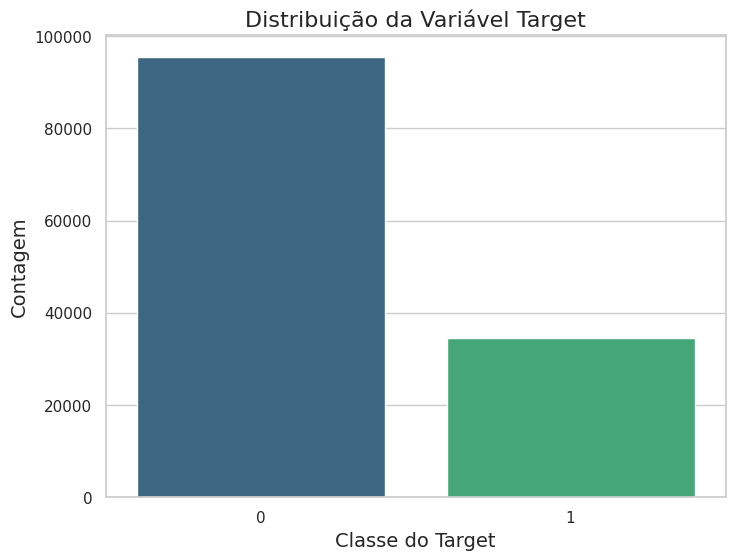

In [25]:
# Contar a frequência de cada valor na variável 'target'
class_counts = development_sample['target'].value_counts()

# Exibir as contagens
print("Contagem das classes:")
print(class_counts)

# Calcular a proporção de cada classe
class_proportions = development_sample['target'].value_counts(normalize=True)
print("\nProporção das classes:")
print(class_proportions)

# Plotar gráfico de barras para a distribuição das classes
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=development_sample, palette='viridis')

# Adicionar título e rótulos
plt.title('Distribuição da Variável Target', fontsize=16)
plt.xlabel('Classe do Target', fontsize=14)
plt.ylabel('Contagem', fontsize=14)

# Exibir o gráfico
plt.show()



### 11ª Etapa: Bag of Words (BoW)

In [26]:
# O Bag of Words (BoW) é uma técnica de representação de texto que transforma os textos em uma forma numérica, ou seja, transforma palavras em características que podem ser utilizadas por modelos de machine learning. Ele ajuda a converter o texto em dados numéricos, permitindo que você use algoritmos de machine learning para analisar os dados textuais.

from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Criar o vetor Bag of Words (BoW)
vectorizer = CountVectorizer(stop_words=None)  # Não removendo stop words, já que o texto já foi tratado e lematizado

# Transformar os textos em uma matriz de características
X = vectorizer.fit_transform(development_sample['review_text_lemmatized'])

# As labels (alvo) continuam sendo 'target'
y = development_sample['target']


### 12ª Etapa: Divisão dos dados - Treino e Teste

In [27]:
# Dividir o dataset em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar a distribuição das classes antes do SMOTE
print(f'Distribuição original do treino:\n{y_train.value_counts()}')


Distribuição original do treino:
target
0    76286
1    27604
Name: count, dtype: int64


### 13ª Etapa: Balanceamento de Classes

In [28]:
# Aplicar SMOTE para balanceamento das classes
smote = SMOTE(random_state=42)

# Ajuste do modelo SMOTE com os dados de treino
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Verificar a nova distribuição das classes após o balanceamento
print(f'Distribuição após SMOTE:\n{y_train_resampled.value_counts()}')


Distribuição após SMOTE:
target
1    76286
0    76286
Name: count, dtype: int64


### 14ª Etapa: Treinar o Modelo

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Treinar o modelo com os dados balanceados
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

### 15ª Etapa: Testar o Modelo

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     19144
           1       0.74      0.85      0.79      6829

    accuracy                           0.88     25973
   macro avg       0.84      0.87      0.86     25973
weighted avg       0.89      0.88      0.89     25973

              precision    recall  f1-score   support

Positive (0)       0.94      0.89      0.92     19144
Negative (1)       0.74      0.85      0.79      6829

    accuracy                           0.88     25973
   macro avg       0.84      0.87      0.86     25973
weighted avg       0.89      0.88      0.89     25973



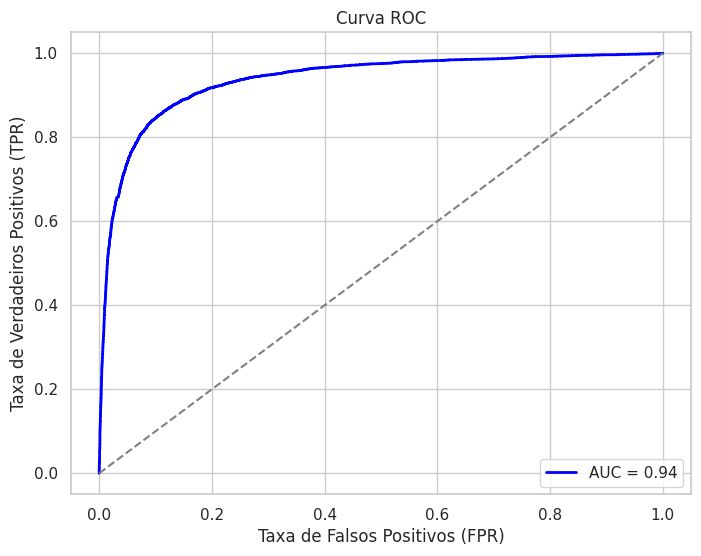

In [31]:
# Fazer previsões no conjunto de teste
y_pred = logistic_regression_model.predict(X_test)

# Avaliar o modelo
print(classification_report(y_test, y_pred))

# Obter as probabilidades previstas (não apenas a classe, mas a probabilidade de cada classe)
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]  # Probabilidade da classe negativa (1)

# Gera relatório de classificação
print(classification_report(y_test, y_pred, target_names=['Positive (0)', 'Negative (1)']))

# Calcular a Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calcular a AUC (Área sob a curva)
roc_auc = auc(fpr, tpr)

# Plotar a Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal (classificador aleatório)
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

### 16ª Etapa: Simular Classificação

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Frase que será testada
sentence = "Este produto é excelente e eu recomendaria para um amigo"

# Preprocessa e vetoriza a frase que será analisada
X_test = vectorizer.transform([sentence])

# Efetua predição
prediction = logistic_regression_model.predict(X_test)
prediction_proba = logistic_regression_model.predict_proba(X_test)

# Interprestando o resultado
if prediction[0] == 0:
    sentiment = "Sentimento Positivo"
else:
    sentiment = "Sentimento Negativo"

# Output the result
print(f"Frase: '{sentence}'")

print(f"Resultado: {sentiment}")

print(f"Probabilidade Positiva: {prediction_proba[0,0]}")

print(f"Probabilidade Negativa: {prediction_proba[0,1]}")


Frase: 'Este produto é excelente e eu recomendaria para um amigo'
Resultado: Sentimento Positivo
Probabilidade Positiva: 0.9937667486464019
Probabilidade Negativa: 0.006233251353598138
